# import libraries

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
import pandas as pd

# read images

img_1 shape: (200, 200, 3)
img_2 shape: (200, 200, 3)


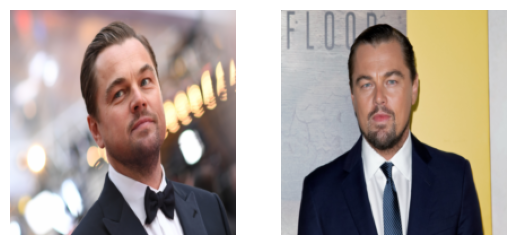

In [50]:
img_1 = plt.imread('1.jpg')
img_1 = resize(img_1, (200, 200))
print(f"img_1 shape: {img_1.shape}")

img_2 = plt.imread('2.jpg')
img_2 = resize(img_2, (200, 200))
print(f"img_2 shape: {img_2.shape}")

plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_2)
plt.axis('off')
plt.show()

# convert to gray scale

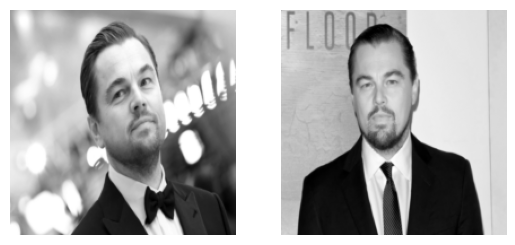

In [54]:
img_1 = img_1[:,:,0]
img_2 = img_2[:,:,0]

plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_2, cmap='gray')
plt.axis('off')
plt.show()

# compare images with two criterias

In [31]:
if np.array_equal(resized_img_1, resized_img_2):
    print("Equal")
else:
    print("Not Equal")

Not Equal


In [33]:
mae = np.abs(img_1 - img_2).mean()
mse = np.pow(img_1 - img_2, 2).mean()

mae, mse

(np.float64(0.28609348636378307), np.float64(0.1430361295512715))

# set threshold 

In [57]:
threshold = 0.28
result = ''
if mae <= threshold:
    result = 'Face Matched'
elif mse <= threshold:
    result = 'Face Matched'
else:
    result = 'Face Not Matched'

print(result)

Face Matched


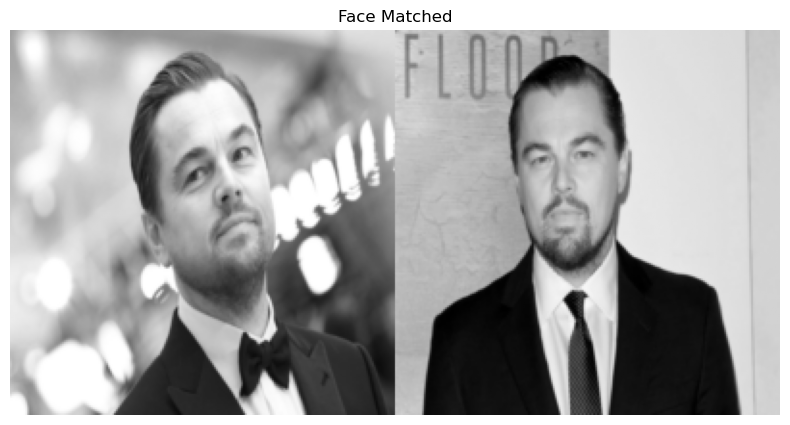

In [58]:
combined = np.hstack((img_1, img_2))

# Show
plt.figure(figsize=(10, 5))
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.title(result)
plt.show()

# read two new images

img_3 shape: (200, 200, 3)
img_4 shape: (200, 200, 3)


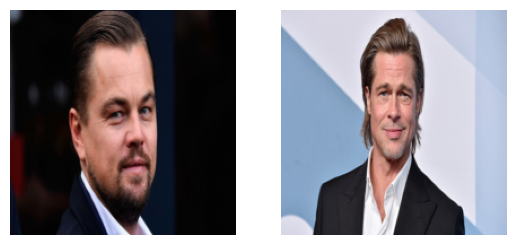

In [51]:
img_3 = plt.imread('3.jpg')
img_3 = resize(img_3, (200, 200))
print(f"img_3 shape: {img_3.shape}")

img_4 = plt.imread('4.jpg')
img_4 = resize(img_4, (200, 200))
print(f"img_4 shape: {img_4.shape}")

plt.subplot(1, 2, 1)
plt.imshow(img_3)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_4)
plt.axis('off')
plt.show()

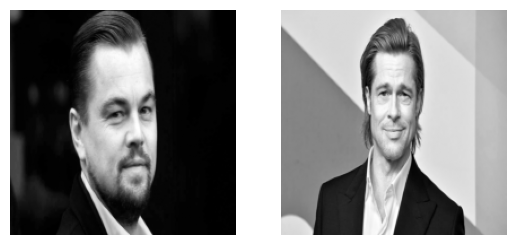

In [52]:
img_3 = img_3[:,:,0]
img_4 = img_4[:,:,0]

plt.subplot(1, 2, 1)
plt.imshow(img_3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_4, cmap='gray')
plt.axis('off')
plt.show()

In [62]:
mae_test_1 = np.abs(img_1 - img_3).mean()
mse_test_1 = np.pow(img_1 - img_3, 2).mean()

print(f"test image 3 has mae: {mae_test_1}")
print(f"test image 3 has mse: {mse_test_1}")

if mse_test_1 <= threshold:
    result = 'Face Matched'
elif mae_test_1 <= threshold:
    result = 'Face Matched'
else:
    result = 'Face Not Matched'

print(result)

test image 3 has mae: 0.5137273635282636
test image 3 has mse: 0.3503093533568899
Face Not Matched


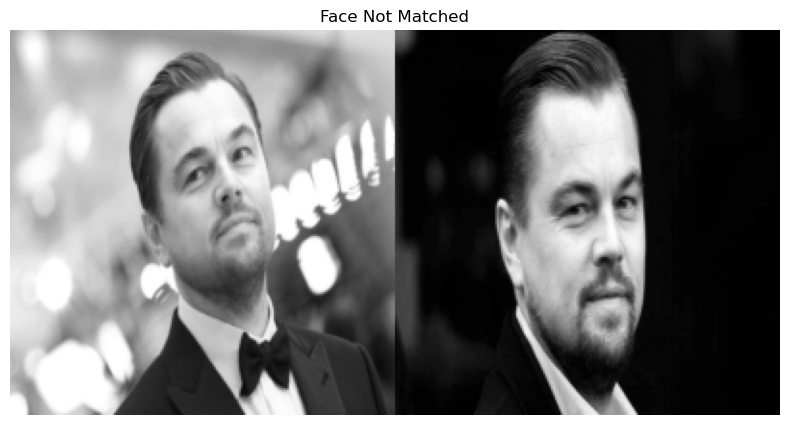

In [63]:
combined = np.hstack((img_1, img_3))

# Show
plt.figure(figsize=(10, 5))
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.title(result)
plt.show()

In [64]:
mae_test_2 = np.abs(img_1 - img_4).mean()
mse_test_2 = np.pow(img_1 - img_4, 2).mean()

print(f"test image 4 has mae: {mae_test_2}")
print(f"test image 4 has mse: {mse_test_2}")

if mse_test_2 <= threshold:
    result = 'Face Matched'
elif mae_test_2 <= threshold:
    result = 'Face Matched'
else:
    result = 'Face Not Matched'

print(result)

test image 4 has mae: 0.2997656849249172
test image 4 has mse: 0.1410698875184758
Face Matched


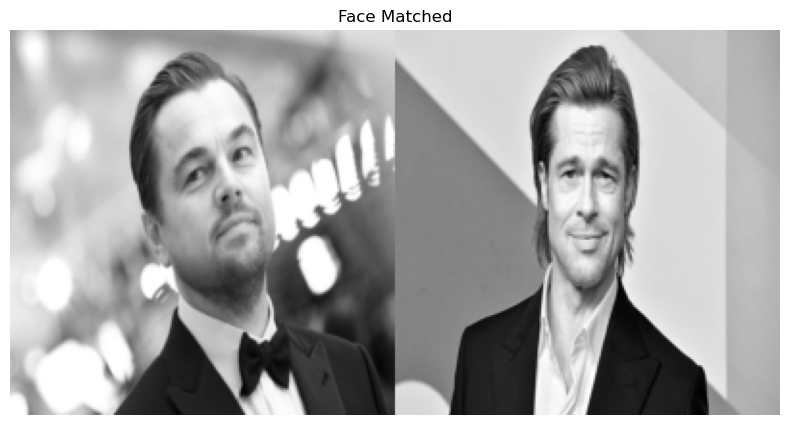

In [66]:
combined = np.hstack((img_1, img_4))

# Show
plt.figure(figsize=(10, 5))
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.title(result)
plt.show()

# test multiple images' mse

In [67]:
def calculate_mse(path):
    img = plt.imread(path)
    img = resize(img, (200, 200))
    img = img[:,:,1]
    return np.pow(img_1 - img, 2).mean()

In [68]:
path_array = ['2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg']
names = ['leo1', 'leo2', 'brad', 'will', 'kate w', 'kate b', 'dog']
mse_array = [calculate_mse(path) for path in path_array]


In [86]:
name_mse = zip(names, mse_array)

In [93]:
df = pd.DataFrame(data=zip(names, mse_array), columns=['name', 'mse'])
df

,name,mse
0,leo1,0.133080
1,leo2,0.359934
2,brad,0.136825
3,will,0.180758
4,kate w,0.144430
5,kate b,0.211428
6,dog,0.173459


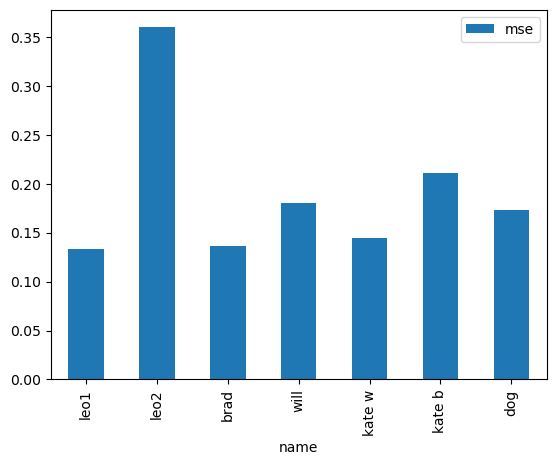

In [95]:
df.plot.bar(x='name', y='mse')
plt.show()

* dog is more simillar to leo than leo2 image
* dog is more similar to leo than will.
* brad and kate w has simillar mse values to leo1

Our system does not work well:
* Background, lightning, image orientation. clothing, even type of camera can have effect on our system.
* a dog is more simillar to human in this system than will and leo2.
